# Fuzzing 101

We'll start with a simple fuzzer.  The idea is to produce random characters, adding them to a buffer string variable (`out`), and finally returning the string.

This implementation uses the following Python features and functions:

* `random.randrange(start, end)` - return a random number [`start`, `end`]
* `range(start, end)` - create a list with integers from `start` to `end`.  Typically used in iterations.
* `for elem in list: body` executes `body` in a loop with `elem` taking each value from `list`.
* `for i in range(start, end): body` executes `body` in a loop with `i` from `start` to `end` - 1.
* `chr(n)` - return a character with ASCII code `n`



In [2]:
import random

In [3]:
# We set a specific seed to get the same inputs each time
random.seed(53727895348829)

In [4]:
def fuzzer(max_length = 100, char_start = 32, char_range = 32):
    """A string of up to `max_length` characters 
       in the range [`char_start`, `char_start` + `char_range`]"""
    string_length = random.randrange(0, max_length)
    out = ""
    for i in range(0, string_length):
        out += chr(random.randrange(char_start, char_start + char_range))
    return out

With its default arguments, the `fuzzer()` function returns a string of random characters:

In [5]:
fuzzer()

'0(!#4<3&4)03*%640<1#==(8+ =65:7=459+26\'=/>*!74)-"?8.%2#1!;5557:7\'-/39;/)#/9'

We can also have `fuzzer()` produce a series of upercase letters.  We use `ord(c)` to return the ASCII code of the character `c`.

In [29]:
fuzzer(100, ord('A'), 26)

'CVHPZGVFHNROJIPUJQDZWZHOHLWVEABMMGEBXRGSFPHEWHCOHZZTGTGMVXHRTKQCQSNLTRVYAH'

We can also have it produce a series of digits:

In [30]:
fuzzer(100, ord('0'), 10)

'647778404926'

My personal favorite, though, is still simply to have `fuzzer()` produce a long list of garbage...

In [31]:
fuzzer(2000, 32, 96)

'~cV^t2FGF9dg>7+4`l)(berJ/R|r:WrPY0;?N8N.E[pepB8gn/tV=Yl>\\^/y#[u",,\\z=Yr\'+ruyoXo&OKfIy\'NBQR%sjCv+>Llwh#C}er\'8=#-FgB.x! 52aJ#:6Mm}.5T? =E> HnA:UgK(4?*jBr9CDB,jM[I*P\x7fm:Dv-JXa>#0?*a| QtB\'LwZQ+1Sk jQAS~f}f40!9vcd>^S HhTPtxkbG.frk6cd^}9uz\'-!S!i}]MopO6KHk?[Hm(2]="sx\'lkhpCA^~9y4NU2*TXE`Xy`!-?.6R&yc\x7fFZ+\\;2%finsWnGXfBHj["{VQ+?,UVLdXvyt8//w4](K^N"F]nu5-RX_Vm.M{16j+\')/e(^MCFVI!$9"Fw5&C.Bh-W\\?Hy%Gim"!UR5S3[>1<19<*.%^7$rU?V|I&~./KSzN;3y}0]I{NMM?qV/nf[:0\x7fXH^-H^f,~%}-#Zhodl>;)m["iYw-`j0|b_5^?Y>c:m1nAU?{l7:lS64/e]@._xSy^-V"N|FA|kh ]\\~n@X6_g/r~XuJ3&;>Vx![]k<sf_/e;7u^<6n,`v+_VC Ehxs@Q!K1%%uJa~q^<%UgNP1D|"g_hn>*\\*MWyp1<SrgB [vm[pA7ge4LJ&wC<*RZ[GWeUrJ[ TjuzDaCacl.rQ\'/S&+xlD314a9a_G.mI<oNrrdaD;apZE\x7f*1e+A/aH~Bv7m.6O{V)iG9i^ gi&r8%D7PS^eS;2S$y?&U\'O[/}csJ2zpCVC|n7kI"[M\x7fW[qg$rGy&\x7f<|\'W=T8<9Cs%Vqii7D9.jR\\;LF,"BqOJQE%H\x7f\\mP89i^s::?qac{2b{[@H;_Ub Yvw%^5_KMux|kJP\\Lq"*X"Q?+g9*/Ttt8@e/RvCP5BIGnU4m;|yD}-GnxJ(ALufq#1h1VXxMCX\x7fUM+"^M6:y23>:WMKhwau;Dn<V%Qz]Ln:`QN s`NTS2#6^j$,~3Mpm

... and to feed this into some function or program.

In [32]:
x = int(fuzzer(100, ord('0'), 10))
print(x)

6440960189750740245088536173029


## Interaction

Here you can try things out by yourself:

In [6]:
try:
    from ipywidgets import interact, interactive, fixed, interact_manual

    x = interact(fuzzer, max_length=(0, 1000, 100), char_start=(32, 128), char_range=(0, 96))
except ImportError:
    pass

<p>Failed to display Jupyter Widget of type <code>interactive</code>.</p>
<p>
  If you're reading this message in the Jupyter Notebook or JupyterLab Notebook, it may mean
  that the widgets JavaScript is still loading. If this message persists, it
  likely means that the widgets JavaScript library is either not installed or
  not enabled. See the <a href="https://ipywidgets.readthedocs.io/en/stable/user_install.html">Jupyter
  Widgets Documentation</a> for setup instructions.
</p>
<p>
  If you're reading this message in another frontend (for example, a static
  rendering on GitHub or <a href="https://nbviewer.jupyter.org/">NBViewer</a>),
  it may mean that your frontend doesn't currently support widgets.
</p>

'$/?-*/;<20?3\'.<.6(!"88,(#-+>.).$=.--9.4%:6!.&;3>>>1#1*9;?)333,/+%*$$5\'9-;8'

## Plots

Finally, some plots:

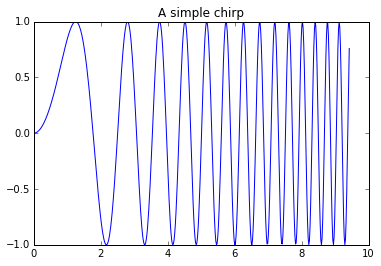

In [34]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 3*np.pi, 500)
plt.plot(x, np.sin(x**2))
plt.title('A simple chirp');

LaTeX math formatting works, too: $x = \sum_{n = 1}^{\infty}\frac{1}{n}$